 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [129]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [130]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_pd= pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_pd.sort_index(ascending = True, inplace = True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
# Count nulls
whale_pd.isnull().sum

<bound method DataFrame.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                         True    

In [132]:
# Drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [133]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.sort_index(ascending = True, inplace = True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [134]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [135]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [136]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [137]:
# Check Data Types
sp500_pd.dtypes

Close    object
dtype: object

In [138]:
# Fix Data Types
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [139]:
# Calculate Daily Returns
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [140]:
# Drop nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [141]:
# Rename Column
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [142]:
# Concatenate all DataFrames into a single DataFrame
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

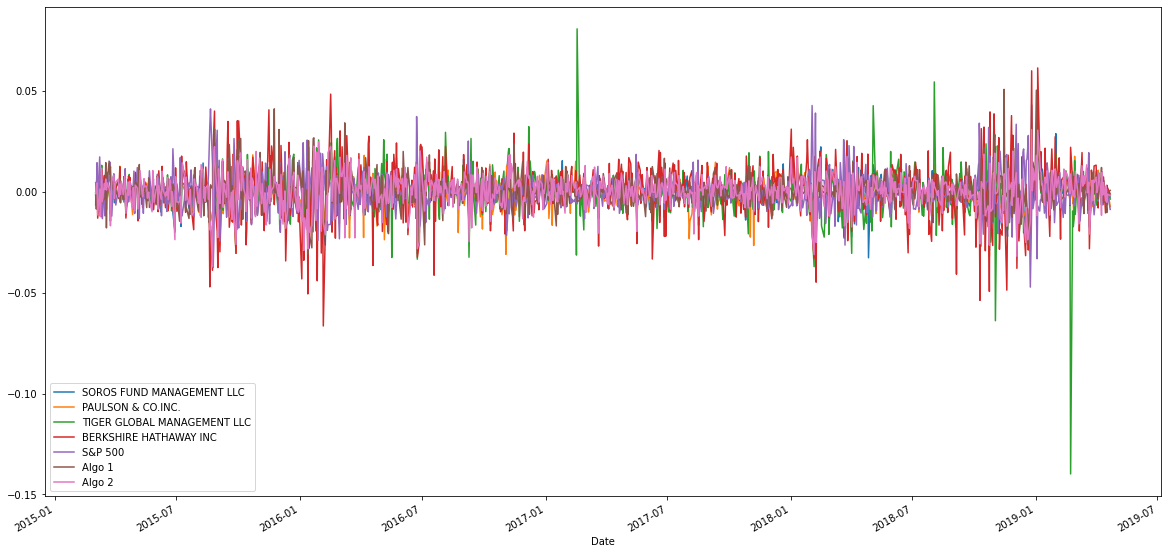

In [143]:
# Plot daily returns
all_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

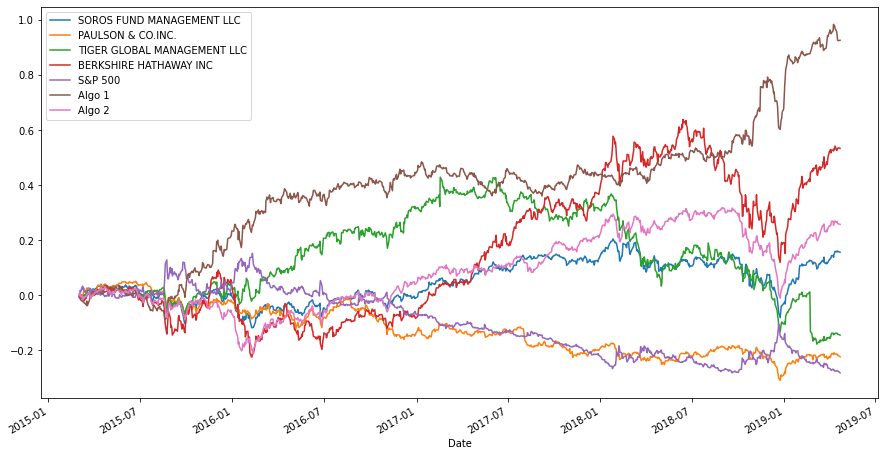

In [144]:
# Plot cumulative returns
cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns.plot(figsize=(15,8))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

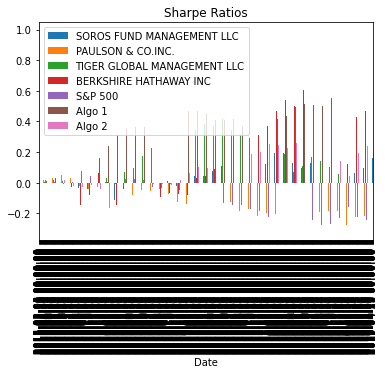

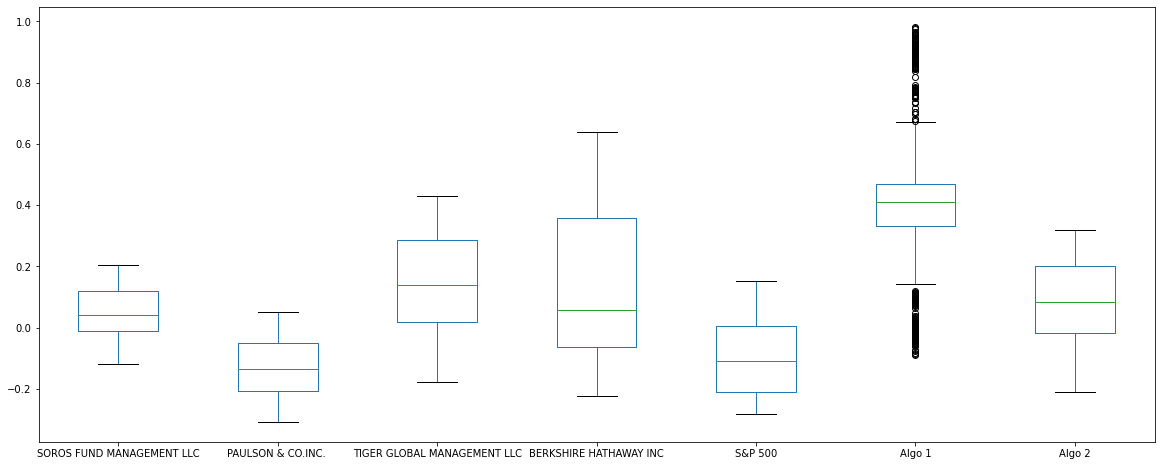

In [145]:
# Box plot to visually show risk
cumulative_returns.plot.bar(title='Sharpe Ratios')
cumulative_returns.plot.box(figsize=(20,8))

In [146]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = all_returns.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
dtype: float64

In [147]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier = daily_std[daily_std > daily_std["S&P 500"]]
riskier.head()

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [148]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

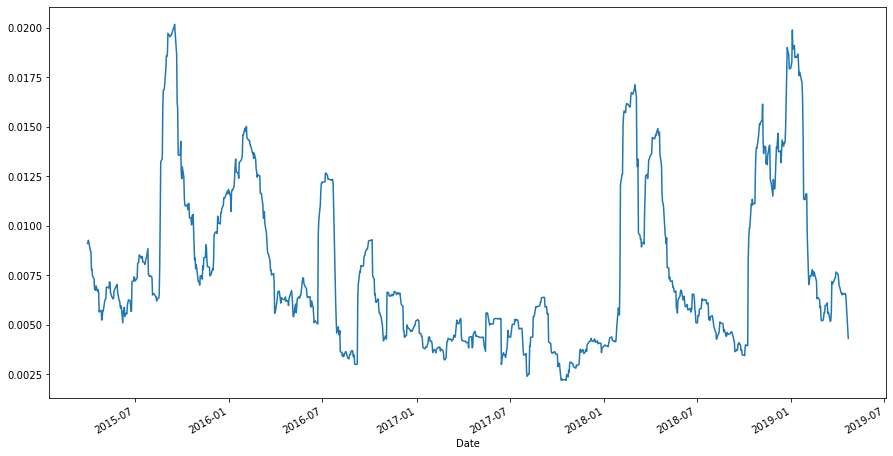

In [149]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
all_returns["S&P 500"].rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


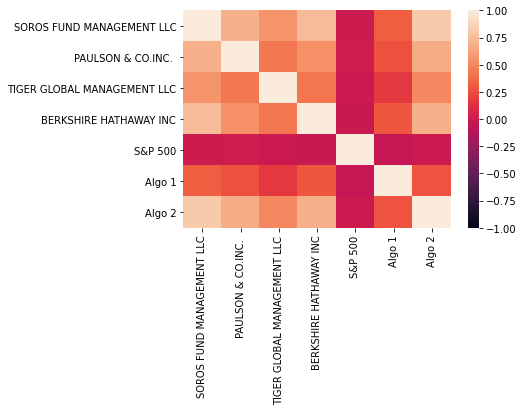

In [150]:
# Construct a correlation table
# YOUR CODE HERE
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

In [151]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
variance = all_returns['S&P 500'].var()
algo1_beta = covariance / variance
algo1_beta

-0.020846489408902668

In [152]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_window = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_window = all_returns['S&P 500'].rolling(window=60).var()
rolling_window

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P 500, Length: 1042, dtype: float64

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [153]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<AxesSubplot:>

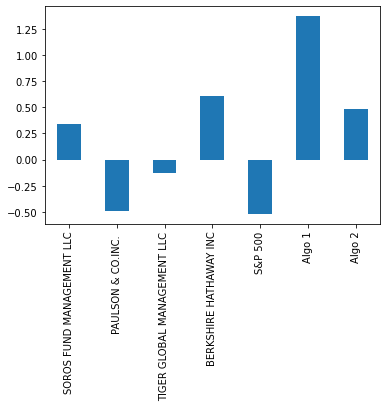

In [154]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [155]:
# Read the first stock
nvax_csv = Path("./Resources/NVAX_historic.csv")
nvax_df = pd.read_csv(nvax_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvax_df.rename( columns={"Close": "nvax"},inplace = True )

In [156]:
# Read the second stock
mrna_csv = Path("./Resources/MRNA_historic.csv")
mrna_df = pd.read_csv(mrna_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
mrna_df.rename( columns={"Close": "mrna"},inplace = True )

In [157]:
# Read the third stock
vxrt_csv = Path("./Resources/VXRT_historic.csv")
vxrt_df = pd.read_csv(vxrt_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
vxrt_df.rename( columns={"Close": "vxrt"},inplace = True )

In [158]:
# Concatenate all stocks into a single DataFrame
combined_pt2 = pd.concat([nvax_df,mrna_df,vxrt_df], axis='columns', join='inner')
combined_pt2.head()

,nvax,mrna,vxrt
Date,,,
2018-12-07,41.0,18.60,3.00
2018-12-10,42.8,18.80,2.76
2018-12-11,44.6,18.01,2.70
2018-12-12,49.6,18.68,2.75
2018-12-13,46.0,18.76,2.68


In [159]:
# Reset the index
combined_pt2.index = combined_pt2.index.normalize()

In [180]:
# Pivot so that each column of prices represents a unique symbol
final_portfoilio = combined_pt2.pivot_table (index= "Date")
final_portfoilio

,mrna,nvax,vxrt
Date,,,
2018-12-07,18.60,41.00,3.00
2018-12-10,18.80,42.80,2.76
2018-12-11,18.01,44.60,2.70
2018-12-12,18.68,49.60,2.75
2018-12-13,18.76,46.00,2.68
...,...,...,...
2020-02-05,20.05,6.97,1.09
2020-02-06,19.88,6.84,1.03
2020-02-07,23.24,6.31,1.11


In [161]:
# Drop Nulls
combined_pt2.dropna(inplace=True)
combined_pt2

,nvax,mrna,vxrt
Date,,,
2018-12-07,41.00,18.60,3.00
2018-12-10,42.80,18.80,2.76
2018-12-11,44.60,18.01,2.70
2018-12-12,49.60,18.68,2.75
2018-12-13,46.00,18.76,2.68
...,...,...,...
2020-02-05,6.97,20.05,1.09
2020-02-06,6.84,19.88,1.03
2020-02-07,6.31,23.24,1.11


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [162]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
daily_returns = combined_pt2.pct_change()
portfolio_returns = daily_returns.dot(weights)
custom = pd.DataFrame(portfolio_returns)
custom.head()

,0
Date,
2018-12-07,NaN
2018-12-10,-0.008448
2018-12-11,-0.007235
2018-12-12,0.055943
2018-12-13,-0.031251


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [163]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_pt3 = pd.concat([portfolio_returns, all_returns], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,,
2018-12-10,-0.008448,-0.009854,-0.004736,-0.007709,-0.002190,0.000356,-0.016156,-0.004270
2018-12-11,-0.007235,-0.001686,-0.003164,0.000611,0.001262,-0.005390,-0.008391,-0.002542
2018-12-12,0.055943,0.009128,0.008147,0.002798,0.017475,0.000200,0.002048,0.006321
2018-12-13,-0.031251,-0.006231,-0.005056,0.000476,-0.004340,0.019458,-0.012556,-0.010408
2018-12-14,-0.014264,-0.007269,-0.012273,-0.020367,-0.015391,0.021214,-0.007552,-0.013574


In [164]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pt3.dropna(inplace=True)
combined_pt3

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,,
2018-12-10,-0.008448,-0.009854,-0.004736,-0.007709,-0.002190,0.000356,-0.016156,-0.004270
2018-12-11,-0.007235,-0.001686,-0.003164,0.000611,0.001262,-0.005390,-0.008391,-0.002542
2018-12-12,0.055943,0.009128,0.008147,0.002798,0.017475,0.000200,0.002048,0.006321
2018-12-13,-0.031251,-0.006231,-0.005056,0.000476,-0.004340,0.019458,-0.012556,-0.010408
2018-12-14,-0.014264,-0.007269,-0.012273,-0.020367,-0.015391,0.021214,-0.007552,-0.013574
...,...,...,...,...,...,...,...,...
2019-04-15,0.010235,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-16,-0.038338,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-17,-0.014570,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [165]:
# Risk
annualized_variance_pt2 = (combined_pt3.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

Custom                         0.646811
SOROS FUND MANAGEMENT LLC      0.154141
PAULSON & CO.INC.              0.133581
TIGER GLOBAL MANAGEMENT LLC    0.283241
BERKSHIRE HATHAWAY INC         0.237784
S&P 500                        0.165419
Algo 1                         0.144781
Algo 2                         0.154966
dtype: float64

<AxesSubplot:xlabel='Date'>

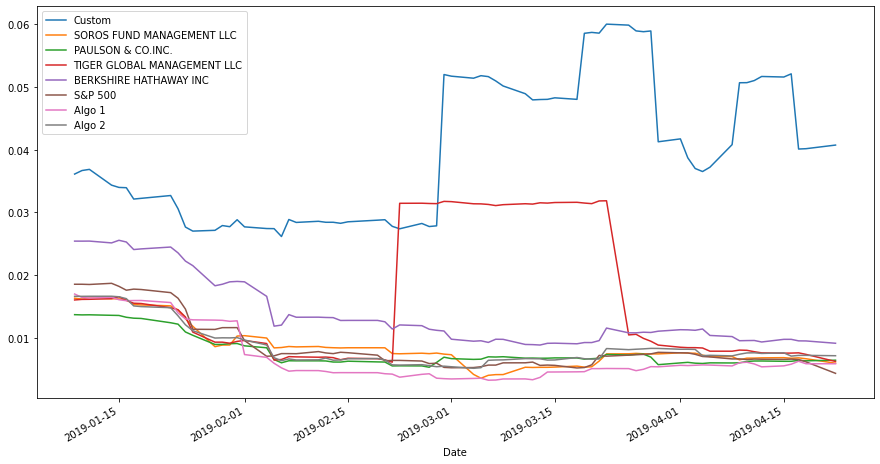

In [166]:
# Rolling
combined_pt3.rolling(window=21).std().plot(figsize=(15,8))

In [167]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (combined_pt3.mean() * 252) / ((combined_pt3).std() * np.sqrt(252))
sharpe_ratios_all

Custom                        -2.183054
SOROS FUND MANAGEMENT LLC      2.126287
PAULSON & CO.INC.              0.526598
TIGER GLOBAL MANAGEMENT LLC   -1.287477
BERKSHIRE HATHAWAY INC         2.346531
S&P 500                       -1.697024
Algo 1                         1.597470
Algo 2                         1.970663
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

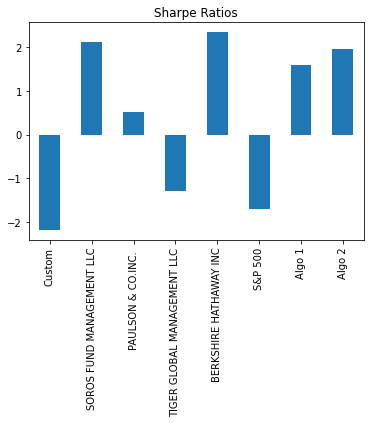

In [168]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

In [169]:
# Create a correlation analysis
correlation = combined_pt3.corr()
correlation

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Custom,1.000000,0.333509,0.267581,0.090260,0.318875,0.005897,0.092282,0.365904
SOROS FUND MANAGEMENT LLC,0.333509,1.000000,0.825693,0.467321,0.834720,-0.071269,0.391572,0.866190
PAULSON & CO.INC.,0.267581,0.825693,1.000000,0.393920,0.714626,-0.128029,0.451039,0.813174
TIGER GLOBAL MANAGEMENT LLC,0.090260,0.467321,0.393920,1.000000,0.294853,-0.017680,0.173736,0.344539
BERKSHIRE HATHAWAY INC,0.318875,0.834720,0.714626,0.294853,1.000000,-0.052910,0.312377,0.815691
S&P 500,0.005897,-0.071269,-0.128029,-0.017680,-0.052910,1.000000,-0.179882,-0.131665
Algo 1,0.092282,0.391572,0.451039,0.173736,0.312377,-0.179882,1.000000,0.478643
Algo 2,0.365904,0.866190,0.813174,0.344539,0.815691,-0.131665,0.478643,1.000000


In [178]:
# Beta
nvax_covariance = daily_returns['nvax'].cov(sp500_pd["S&P 500"])
mrna_covariance = daily_returns['mrna'].cov(sp500_pd["S&P 500"])
vxrt_covariance = daily_returns['vxrt'].cov(sp500_pd["S&P 500"])
variance = sp500_pd["S&P 500"].var()
nvax_beta = nvax_covariance / variance
mrna_beta = mrna_covariance / variance
vxrt_beta = vxrt_covariance / variance